# Práctica 4
integrantes:
- Moreno Santamaría Luis Daniel
- Ramos García Luis Gerardo
- Rico Mendoza Josue

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

sns.set_theme()
flierprops = dict(marker = "+", color = "r")

El comportamiento de mortalidad ingantil(MI) en relación con el PIB per cápita (PIBPC). Vimos que el PIBPC ejerce un impacto negativo sobre la MI, como era de esperarse. Ahora se presenta el alfabetismo femenino medido por la tasa de alfabetización de las mujeres (TAM). A priori, es espera que la TAM también ejerza un impacto negativo en la MI. Ahora que se introducen ambas variables en el modelo, se requiere eliminar la influencia neta de cada regresora. Es decir, necesitamos estimar los coeficientes de regresión (parcial) de cada regresora. Por lo tanto, el modelo, es: $$MI_i = \beta_1 + \beta_2 PIBPC_i + \beta_3 TAM_i + u_i$$

Los datos necesarios se proporcionan.
<br>MI es el número de muertes de niños menores de 5 años por cada 1,000 nacidos vivos
<br>PIBPC es el PIB per cápita en 1980
<br>TAM se mide en porcentaje.
<br>La muestra se realizó en 64 países. obtienen los siguientes resultados.
$$\widehat{MI}_i = 263.6416 - 0.0056 PIBPC_i - 2.2316 TAM_i$$
$$ee = (11.5932) (0.0019) (0.2099)$$
$$R² = 0.7077$$
$$\overline{R²} = 0.6981*$$

## Datos

In [59]:
MI = (128, 204, 202, 197, 96, 209, 170, 240, 241, 55, 75, 129, 24, 165, 94, 96, 148, 98, 161, 118, 269, 189, 126, 12, 167, 135, 107, 72, 128, 27, 152, 224, 142, 104, 287, 41, 312, 77, 142, 262, 215, 246, 191, 182, 37, 103, 67, 143, 83, 223, 240, 312, 12, 52, 79, 61, 168, 28, 121, 115, 186, 47, 178, 142)
TAF = (37, 22, 16, 65, 76, 26, 45, 29, 11, 55, 87, 55, 93, 31, 77, 80, 30, 69, 43, 47, 17, 35, 58, 81, 29, 65, 87, 63, 49, 63, 84, 23, 50, 62, 31, 66, 11, 88, 22, 22, 12, 9, 31, 19, 88, 35, 85, 78, 85, 33, 19, 21, 79, 83, 43, 88, 28, 95, 41, 62, 45, 85, 45, 67)
PIBPC = (1870, 130, 310, 570, 2050, 200, 670, 300, 120, 290, 1180, 900, 1730, 1150, 1160, 1270, 580, 660, 420, 1080, 290, 270, 560, 4240, 240, 430, 3020, 1420, 420, 19830, 420, 530, 8640, 350, 230, 1620, 190, 2090, 900, 230, 140, 330, 1010, 300, 1730, 780, 1300, 930, 690, 200, 450, 280, 4430, 270, 1340, 670, 410, 4370, 1310, 1470, 300, 3630, 220, 560)
TFT = (6.66, 6.15, 7, 6.25, 3.81, 6.44, 6.19, 5.89, 5.89, 2.36, 3.93, 5.99, 3.5, 7.41, 4.21, 5, 5.27, 5.21, 6.5, 6.12, 6.19, 5.05, 6.16, 1.8, 4.75, 4.1, 6.66, 7.28, 8.12, 5.23, 5.79, 6.5, 7.17, 6.60, 7, 3.91, 6.7, 4.2, 5.43, 6.50, 6.25, 7.1, 7.1, 7, 3.46, 5.66, 4.82, 5, 4.74, 8.49, 6.5, 6.5, 1.69, 3.25, 7.17, 3.52, 6.09, 2.86, 4.88, 3.89, 6.9, 4.1, 6.09, 7.2)
data = np.array([MI, PIBPC, TAF, TFT])
X = data[1:3, :]
y = data[0, :]

## Análisis Gráfico

Se realizó un análisis gráfico para apicar algún tipo de regularización a los datos y optimizar el proceso de gradiente descendiente, después del análisis se concluyó que que lo más optimo era una estandarización "min-max" porque la variable "PIBPC" no está distribuida de manera gaussiana. El proceso iterativo tuvo éxito, lamentablemente al transformar las variables regresoras, solo se logró re-escalar la variable dependiente y no las betas, ni los erroes estándar..

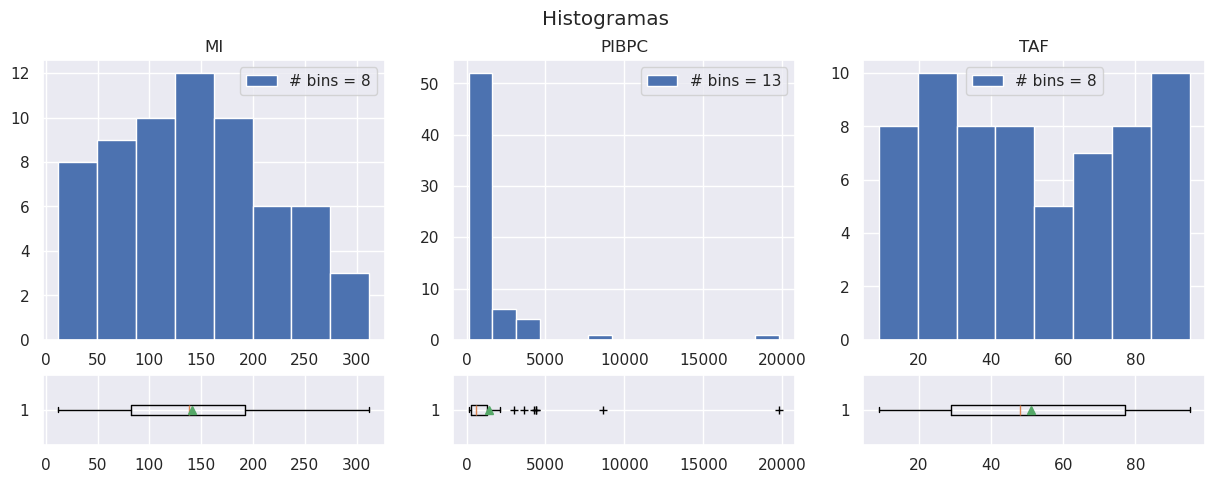

In [60]:
bins = 8 # stuges rule 1 + 3. 322 logN
bin_mod = 5 # PIBPC is skewed
fig, axs = plt.subplots(2,3, figsize = (15,5), gridspec_kw = {'height_ratios': [4, 1]})
fig.suptitle("Histogramas")
axs[0, 0].hist(MI, bins = bins, label = f"# bins = {bins}")
axs[0, 0].set_title("MI")
axs[0, 0].legend()
axs[1, 0].boxplot(MI, orientation = "horizontal", flierprops = flierprops, showmeans = True)
axs[0, 1].hist(PIBPC, bins = bins + bin_mod, label = f"# bins = {bins + bin_mod}")
axs[0, 1].set_title("PIBPC")
axs[0, 1].legend()
axs[1, 1].boxplot(PIBPC, orientation = "horizontal", flierprops = flierprops, showmeans = True)
axs[0, 2].hist(TAF, bins = bins, label = f"# bins = {bins}")
axs[0, 2].set_title("TAF")
axs[0, 2].legend()
axs[1, 2].boxplot(TAF, orientation = "horizontal", flierprops = flierprops, showmeans = True)
plt.show()

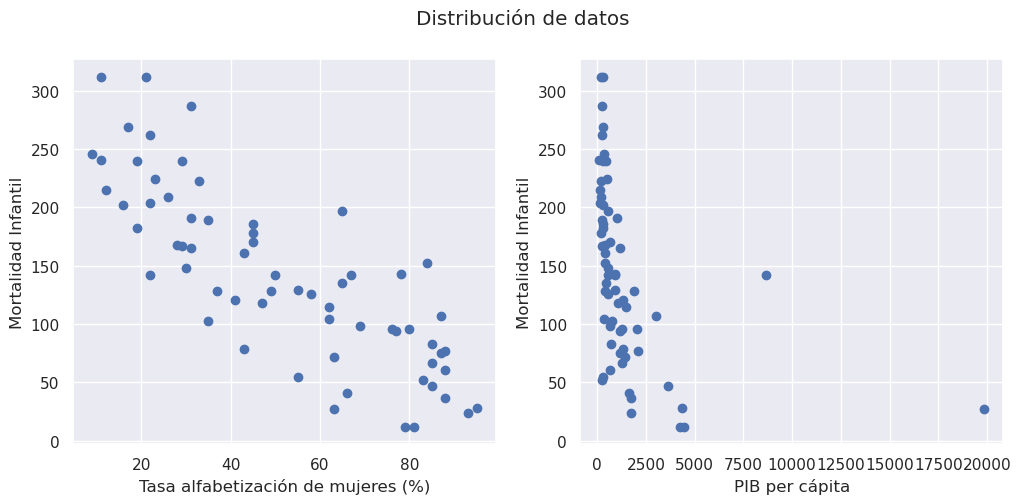

In [61]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
axs[0].scatter(TAF, MI)
axs[0].set_xlabel("Tasa alfabetización de mujeres (%)")
axs[0].set_ylabel("Mortalidad Infantil")
axs[1].scatter(PIBPC, MI)
axs[1].set_xlabel("PIB per cápita")
axs[1].set_ylabel("Mortalidad Infantil")
plt.suptitle("Distribución de datos")
plt.show()

## Entrenamiento

In [62]:
def regresion_matricial(y, X):
  m = X.shape[0]

  # Agregar columna de unos manualmente (para el intercepto)
  unos = np.ones((m, 1))
  X_ext = np.concatenate((unos, X), axis=1)
  # Aplicar fórmula cerrada paso a paso
  X_T = np.transpose(X_ext)
  XTX = np.dot(X_T, X_ext)
  XTX_inv = np.linalg.inv(XTX)
  XTy = np.dot(X_T, y)
  B_cerrada = np.dot(XTX_inv, XTy)

  print("Intercepto (b0):", B_cerrada[0])
  print("Coeficientes (b1, b2, ...):", B_cerrada[1:])

  return B_cerrada

In [63]:
X1 = X[0, :].reshape(-1,1)
X2 = X[1, :].reshape(-1,1)
Bm = regresion_matricial(y, X.T)
Bm_x1 = regresion_matricial(y, X1)
Bm_x2 = regresion_matricial(y, X2)

Intercepto (b0): 263.6415856197938
Coeficientes (b1, b2, ...): [-0.00564659 -2.23158573]
Intercepto (b0): 157.42444057653265
Coeficientes (b1, b2, ...): [-0.01136445]
Intercepto (b0): 263.8635152972926
Coeficientes (b1, b2, ...): [-2.39049603]


### Librería

Usamos SciPy para comparar los resultados propios contra los de una librería.

In [64]:
import statsmodels.api as sm
new_X = np.array([(pibpc, taf) for (pibpc, taf) in zip(PIBPC, TAF)])
new_X = sm.add_constant(new_X)
model = sm.OLS(y, new_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Sun, 11 May 2025   Prob (F-statistic):           5.12e-17
Time:                        18:29:10   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.000     240.460     286.824
x1            -0.0056      0.002     -2.819      0.006      -0.010      -0.002
x2            -2.2316      0.210    -10.629      0.000      -2.651      -1.812
==============================================================================
Omnibus:                        0.732   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.559
Skew:                           0.228   Prob(JB):                        0.756
Kurtosis:                       2.949   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

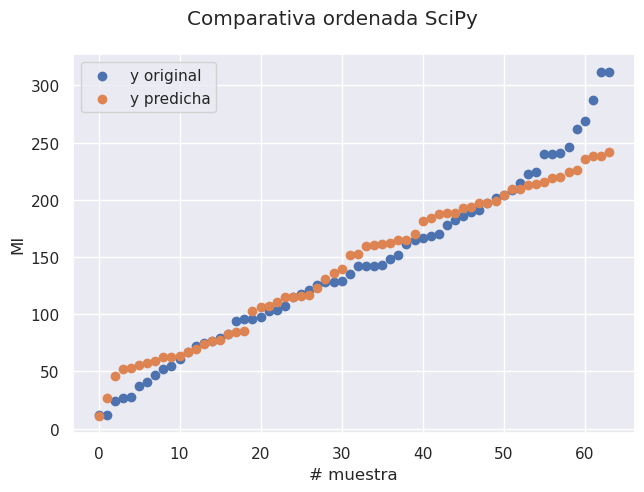

In [65]:
y_hat = results.params[0] + results.params[1] * X[0, :] + results.params[2] * X[1, :]

plt.scatter(range(len(y)), np.sort(y), label = "y original")
plt.scatter(range(len(y_hat)), np.sort(y_hat), label = "y predicha")
plt.suptitle("Comparativa ordenada SciPy")
plt.legend()
plt.tight_layout()
plt.xlabel("# muestra")
plt.ylabel("MI")
plt.show()

### Resultados propios

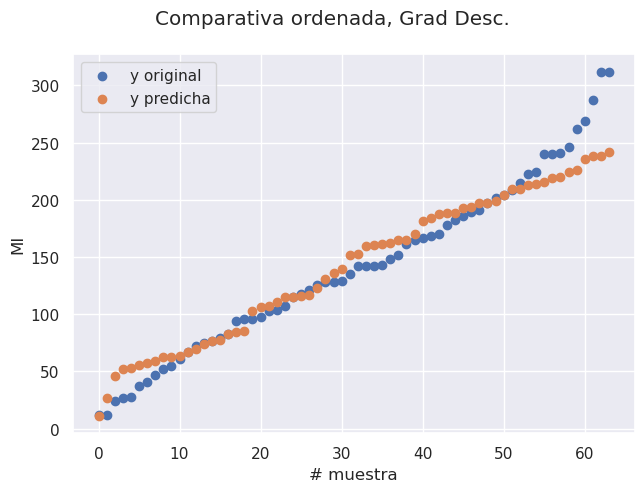

In [66]:
ym_hat = Bm[0] + Bm[1] * X[0, : ] + Bm[2] * X[1, :]
plt.scatter(range(len(y)), np.sort(y), label = "y original")
plt.scatter(range(len(ym_hat)), np.sort(ym_hat), label = "y predicha")
plt.suptitle("Comparativa ordenada, Grad Desc.")
plt.legend()
plt.tight_layout()
plt.xlabel("# muestra")
plt.ylabel("MI")
plt.show()

[R cuadrada por variable](https://stats.stackexchange.com/questions/412526/coefficient-of-determination-r2-for-each-variable-in-multiple-regression)

[Error estándar](https://gc.scalahed.com/recursos/files/r157r/w13102w/Estadistica%202_4aEd_07.pdf)

In [67]:
def r(y, y_obtenida, k):
    n = len(y)
    src = np.sum((y - y_obtenida) ** 2)
    stc = np.sum((y - y.mean()) ** 2)


    r_cuadrada = 1 - (src / stc)
    adj_r_cuadrada = 1 - (1 - r_cuadrada) * ((n - 1)/(n - k))

    sigma = (src / (n - k - 1)) ** .5

    ee = sigma / (stc * (1 - r_cuadrada)) ** .5

    print(f"src = {src}")
    print(f"stc = {stc}")
    print(f"R² = {r_cuadrada}")
    print(f"adj R² = {adj_r_cuadrada}")
    print(f"ee = {ee}")
    
    return sigma, r_cuadrada, adj_r_cuadrada

In [68]:
print("y = 1: \n")
r(np.array(y), y.mean(), 1)
print("\n\ny = y.mean(): \n")
r(np.array(y).reshape(-1,1), np.ones((len(y), 1)), 1)
print("\n\ny = b_0 + b_1 X_1\n")
r(y, Bm_x1[0] + Bm_x1[1] * X[0, : ], 1)
print("\n\ny = b_0 + b_2 X_2\n")
# tiene sentido que el r² sea negativo, pues no parece haber mucha correlación en el análisis gráfico
r(y, Bm_x2[0] + Bm_x2[1] * X[0, : ], 1)
print("\n\ny = b_0 + b_1 X_1 + b_2 X_2\n")
sigma, r_cuadrada, adj_r_cuadrada = r(y, ym_hat, 2)

y = 1: 

src = 363678.0
stc = 363678.0
R² = 0.0
adj R² = 0.0
ee = 0.12700012700019048


y = y.mean(): 

src = 1627054.0
stc = 363678.0
R² = -3.473886240025517
adj R² = -3.473886240025517
ee = 0.1270001270001905


y = b_0 + b_1 X_1

src = 303228.53946014267
stc = 363678.0
R² = 0.16621698463986645
adj R² = 0.16621698463986645
ee = 0.12700012700019048


y = b_0 + b_2 X_2

src = 3316207537.5036283
stc = 363678.0
R² = -9117.52665683277
adj R² = -9117.52665683277
ee = 0.1270001270001905


y = b_0 + b_1 X_1 + b_2 X_2

src = 106315.6269492313
stc = 363678.0
R² = 0.7076654981900712
adj R² = 0.7029504255802337
ee = 0.12803687993289598


In [69]:
def ee(sigma, x):
    epsilon = .00000000000000000001
    ee = sigma / (np.sum((x - x.mean()) ** 2) + epsilon) ** .5
    return ee

# ee0 = ee(sigma, np.ones((len(y), 1))) da el mismo error estándar
ee0 = ee(sigma, y.mean()) 
ee1 = ee(sigma, X1)
ee2 = ee(sigma, X2)

In [70]:
from tabulate import tabulate

# Example data
table = [
    ["beta 0", results.params[0],  Bm[0], 263.6416],
    ["beta 1", results.params[1] , Bm[1], -0.0056],
    ["beta 2", results.params[2] , Bm[2], -2.2316],
    ["ee 0", results.bse[0] ,ee0 , 11.5932],
    ["ee 1", results.bse[1], ee1, 0.0019],
    ["ee 1", results.bse[2], ee2, 0.2099],
    ["R cuadrada", results.rsquared , r_cuadrada, 0.7077],
    ["R cuadrada ajustada", results.rsquared_adj, adj_r_cuadrada, "0.6981*"]
]

headers = ["Parámetro", "SciPy", "Grad. Desc.", "Deseado"]
print("TABLA COMPARATIVA DE RESULTADOS OBTENIDOS")
print(tabulate(table, headers=headers, tablefmt="grid"))
print("Se desconoce el significado del astetisco en la r cuadrada ajustada")

TABLA COMPARATIVA DE RESULTADOS OBTENIDOS
+---------------------+--------------+---------------+-----------+
| Parámetro           |        SciPy |   Grad. Desc. | Deseado   |
+=====================+==============+===============+===========+
| beta 0              | 263.642      | 263.642       | 263.6416  |
+---------------------+--------------+---------------+-----------+
| beta 1              |  -0.00564659 |  -0.00564659  | -0.0056   |
+---------------------+--------------+---------------+-----------+
| beta 2              |  -2.23159    |  -2.23159     | -2.2316   |
+---------------------+--------------+---------------+-----------+
| ee 0                |  11.5932     |   4.17478e+11 | 11.5932   |
+---------------------+--------------+---------------+-----------+
| ee 1                |   0.00200326 |   0.00192968  | 0.0019    |
+---------------------+--------------+---------------+-----------+
| ee 1                |   0.209947   |   0.202236    | 0.2099    |
+-------------------